In [1]:
!pip install yfinance

## 포트폴리오 조정

1. SPY (S&P 500 ETF)
2. QQQ (NASDAQ 100 ETF)
3. GLD (Gold ETF)
4. USO (Oil ETF)
5. TLT (Treasury Bond ETF): 미국 국채


In [14]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# 초기 설정
initial_investment = 1e8  # 1억 달러
portfolio = {
    'SPY': 0.3,  # S&P 500 ETF: 30%
    'QQQ': 0.2,  # NASDAQ ETF: 20%
    'GLD': 0.2,  # Gold ETF: 20%
    'USO': 0.2,  # Oil ETF: 20%
    'TLT': 0.1   # Treasury Bond ETF: 10%
}

start_date = "2015-01-01"
end_date = "2025-01-01"

data = yf.download(list(portfolio.keys()), start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


금융상품별 분석 결과:
SPY: 최대 낙폭 (MDD): -33.72%, 총 수익률: 239.57%
QQQ: 최대 낙폭 (MDD): -35.12%, 총 수익률: 436.64%
GLD: 최대 낙폭 (MDD): -22.00%, 총 수익률: 112.25%
USO: 최대 낙폭 (MDD): -89.77%, 총 수익률: -52.52%
TLT: 최대 낙폭 (MDD): -48.35%, 총 수익률: -11.77%


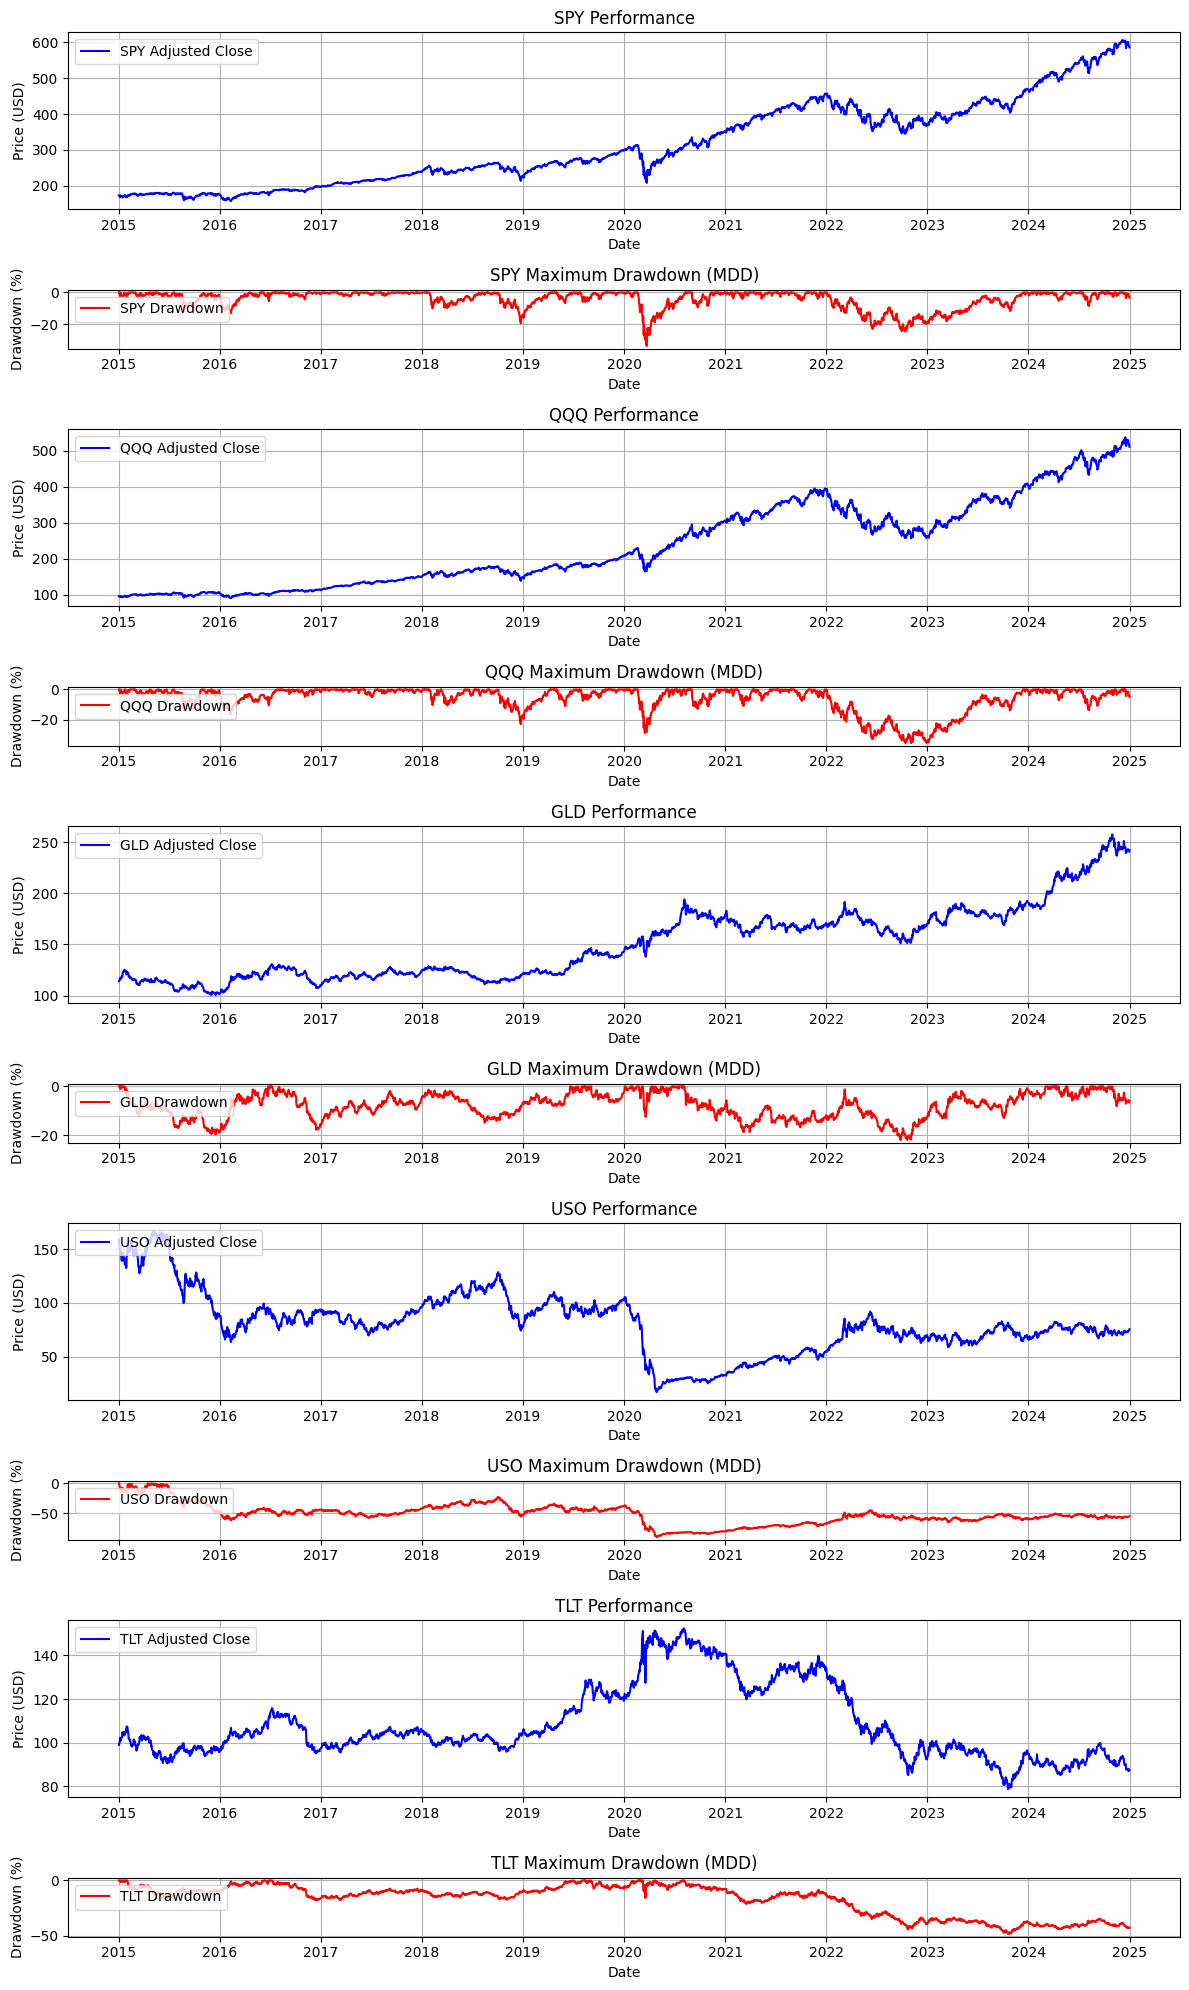

In [15]:
# MDD 및 총 수익률 계산 함수
def calculate_metrics(prices):
    normalized = prices / prices.iloc[0]
    cumulative_max = np.maximum.accumulate(normalized)
    drawdown = (normalized - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()
    total_return = (normalized.iloc[-1] - 1) * 100
    return max_drawdown * 100, total_return, drawdown

# 분석 결과 저장 및 출력
results = {}
drawdown_data = {}
for asset in portfolio:
    mdd, total_return, drawdown = calculate_metrics(data[asset])
    results[asset] = {"MDD": mdd, "Total Return": total_return}
    drawdown_data[asset] = drawdown

# 분석 결과 출력
print("금융상품별 분석 결과:")
for asset, metrics in results.items():
    print(f"{asset}: 최대 낙폭 (MDD): {metrics['MDD']:.2f}%, 총 수익률: {metrics['Total Return']:.2f}%")

# 시각화
fig, axes = plt.subplots(len(portfolio) * 2, 1, figsize=(12, 4 * len(portfolio)),
                         gridspec_kw={'height_ratios': [3, 1] * len(portfolio)})

axes = axes.flatten()

for i, asset in enumerate(portfolio.keys()):
    main_ax = axes[i * 2]  # 성과 차트
    sub_ax = axes[i * 2 + 1]  # MDD 차트

    # 성과 차트
    main_ax.plot(data[asset], label=f"{asset} Adjusted Close", color='blue')
    main_ax.set_title(f"{asset} Performance")
    main_ax.set_xlabel("Date")
    main_ax.set_ylabel("Price (USD)")
    main_ax.legend(loc='upper left')
    main_ax.grid()

    # MDD 차트
    sub_ax.plot(drawdown_data[asset] * 100, label=f"{asset} Drawdown", color='red')
    sub_ax.set_title(f"{asset} Maximum Drawdown (MDD)")
    sub_ax.set_xlabel("Date")
    sub_ax.set_ylabel("Drawdown (%)")
    sub_ax.legend(loc='upper left')
    sub_ax.grid()

plt.tight_layout()
plt.show()
